<a href="https://colab.research.google.com/github/Kenrich005/FMCG_StockPricePrediction/blob/main/MLSL1_V11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Supervised Learning 1 - Project Assignment

Team Members: 

1) Deepak Gupta : 12120085  
2) Kenny Devarapalli :  12120062  
3) Saumya Jain : 12120038  
4) Pankaj Kumar : 12120068  
5) Navin Wadhwani : 12120073  

##  0. Understanding the Business Problem

#### Problem Statement
An investment firm is looking for opportunities to invest on equities with a horizon of 3 months. The firm is interested to invest in companies in specific industry sector when the companies declare their quarterly results. They would like to understand if the investment would bring them a minimum expected return or not. So, they are planning to form a team of data scientists to analyse and build ML models to estimate the quarterly return on investment in a company based on the company performance indicators and the external industry and economic factors.



#### Summary  
The project was to determine and assess performance of FMCG (Fast moving consumer goods) companies in India, and determine the returns over a quarterly period. We decided to pursuit FMCG companies as the FMCG index has grown at 15% CAGR and absolute rturns of 137% for the period 2014 to 2019. 

Nifty FMCG index comprises of 15 companies in FMCG sector, and the shuffling of companies happend bi-annually, we decided to select the 20 companies from the FMCG sector indices with highest market cap*.

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1.a Data Collection

Data was scraped from www.moneycontrol.com for the historical quarterly results declared for the calendar year 2014 to 2019. The data was then uploaded below as the dataset for supervised learning model and analysis.

In [ ]:
# Reading the Dataset from GitHub as a dataframe
df =  pd.read_csv('MLSL1v6.csv')

df.head() # Checking the first few rows for the dataframe

,Company,Quarters,Closing Stock Price,Enterprise Value,Oil Price,Change in Oil Price,CPI,Inflation,Net Income,Consumption of Raw Materials,...,EBT,Tax,P/L After Tax from Ordinary Activities,Prior Year Adjustments,Extra Ordinary Items,PAT,Equity Share Capital,Reserves Excluding Revaluation Reserves,Equity Dividend Rate (%),Basic EPS Before Extra Ordinary
0,Britannia,Mar-20,3380.20,65849.04,2392.98,-0.198992,148.6,0.058,"2,691.94","1,125.07",...,445.48,64.32,381.16,0.0,0.0,381.16,24.05,0,0,15.85
1,Britannia,Dec-19,3027.26,65849.04,4509.77,0.884583,150.4,0.074,"2,819.19","1,314.27",...,485.78,125.43,360.35,0.0,0.0,360.35,24.05,0,0,14.99
2,Britannia,Sep-19,2946.20,65849.04,4282.87,-0.050313,145.8,0.040,"2,896.09","1,404.88",...,514.86,92.28,422.58,0.0,0.0,422.58,24.03,0,0,20.50
3,Britannia,Jun-19,2743.56,65849.04,4149.67,-0.031101,142.9,0.032,"2,579.46","1,208.45",...,424.14,141.93,282.21,0.0,0.0,282.21,24.03,0,0,10.41
4,Britannia,Mar-19,3081.96,74019.04,4432.04,0.068046,140.4,0.029,"2,668.10","1,210.55",...,443.9,154.21,289.69,0.0,0.0,289.69,24.03,0,0,12.05


In [ ]:
df.info() # Checking the data type for the variables and also for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Company                                  500 non-null    object 
 1   Quarters                                 500 non-null    object 
 2   Closing Stock Price                      500 non-null    float64
 3   Enterprise Value                         500 non-null    object 
 4   Oil Price                                500 non-null    object 
 5   Change in Oil Price                      500 non-null    float64
 6   CPI                                      500 non-null    float64
 7   Inflation                                500 non-null    float64
 8   Net Income                               500 non-null    object 
 9   Consumption of Raw Materials             500 non-null    object 
 10  Purchase of Traded Goods                 500 non-n

## 1.b Data Cleaning

- Data scrapped through the seed source had to be preprocessed and cleaning was required.  
- For e.g. we see from above output that several numerical columns were read as objects 
- Before proceeding with any analysis we had to clean the data and correct the data type for further feature engineering.




In [ ]:
df['Net Income']                   = df['Net Income'].str.replace(',', '')
df['Net Income']                   = df['Net Income'].astype(float)

df['Equity Share Capital']         = df['Equity Share Capital'].str.replace(',', '')
df['Equity Share Capital']         = df['Equity Share Capital'].astype(float)

df['Interest']                     = df['Interest'].str.replace(',', '')
df['Interest']                     = df['Interest'].astype(float)

df['Consumption of Raw Materials'] = df['Consumption of Raw Materials'].str.replace(',', '')
df['Consumption of Raw Materials'] = df['Consumption of Raw Materials'].astype(float)

df['Purchase of Traded Goods']     = df['Purchase of Traded Goods'].str.replace(',', '')
df['Purchase of Traded Goods']     = df['Purchase of Traded Goods'].astype(float)

df['PAT']     = df['PAT'].str.replace(',', '')
df['PAT']     = df['PAT'].astype(float)

df['EBIT']     = df['EBIT'].str.replace(',', '')
df['EBIT']     = df['EBIT'].astype(float)

df['Oil Price']     = df['Oil Price'].str.replace(',', '')
df['Oil Price']     = df['Oil Price'].astype(float)

# Renaming column for Basic EPS Before Extra Ordinary to EPS

df = df.rename(columns={'Basic EPS Before Extra Ordinary': 'EPS'})

In [ ]:
df.info() #Checking for the columns in the dataset before proceeeding for feature engineering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Company                                  500 non-null    object 
 1   Quarters                                 500 non-null    object 
 2   Closing Stock Price                      500 non-null    float64
 3   Enterprise Value                         500 non-null    object 
 4   Oil Price                                500 non-null    float64
 5   Change in Oil Price                      500 non-null    float64
 6   CPI                                      500 non-null    float64
 7   Inflation                                500 non-null    float64
 8   Net Income                               500 non-null    float64
 9   Consumption of Raw Materials             500 non-null    float64
 10  Purchase of Traded Goods                 500 non-n

### Creating y-variable

The variable to be predicted was % change in stock price based on t-1 quarter results published by the company.  
For e.g. we had to use Dec 2019 quarterly results to predict the % change in the stock price for a compnay in March 2020.

We created the Y variable by cacluating the differrence in the closing stock price at quarter t and closing stock price at quarter t-1. 

In [ ]:
df['Next Quarter StockPrice'] = df.groupby('Company')['Closing Stock Price'].shift(1)
df['Quarterly Return %'] = (df['Next Quarter StockPrice']/df['Closing Stock Price'])-1
df['3% Return'] = np.where(df['Quarterly Return %']>=0.03,1,0)
df.head()

,Company,Quarters,Closing Stock Price,Enterprise Value,Oil Price,Change in Oil Price,CPI,Inflation,Net Income,Consumption of Raw Materials,...,Prior Year Adjustments,Extra Ordinary Items,PAT,Equity Share Capital,Reserves Excluding Revaluation Reserves,Equity Dividend Rate (%),EPS,Next Quarter StockPrice,Quarterly Return %,3% Return
0,Britannia,Mar-20,3380.20,65849.04,2392.98,-0.198992,148.6,0.058,2691.94,1125.07,...,0.0,0.0,381.16,24.05,0,0,15.85,NaN,NaN,0
1,Britannia,Dec-19,3027.26,65849.04,4509.77,0.884583,150.4,0.074,2819.19,1314.27,...,0.0,0.0,360.35,24.05,0,0,14.99,3380.20,0.116587,1
2,Britannia,Sep-19,2946.20,65849.04,4282.87,-0.050313,145.8,0.040,2896.09,1404.88,...,0.0,0.0,422.58,24.03,0,0,20.50,3027.26,0.027513,0
3,Britannia,Jun-19,2743.56,65849.04,4149.67,-0.031101,142.9,0.032,2579.46,1208.45,...,0.0,0.0,282.21,24.03,0,0,10.41,2946.20,0.073860,1
4,Britannia,Mar-19,3081.96,74019.04,4432.04,0.068046,140.4,0.029,2668.10,1210.55,...,0.0,0.0,289.69,24.03,0,0,12.05,2743.56,-0.109800,0


## 2. Feature Engineering

With an intent to predict the % change in the closing stock price from the t-1 quarterly results we had to determine the ratios/features (X Variables) that would summarize the quarterly results and be able capture the company performance with respect to management, governance, resource utilization etc. 

The ratios/features were derived with key performance indicators for the companies on basis of Profitability, Market Value, Cost Managment. 

1) Profitability ratios were the first choise of rations as they are key indicators for financial ratios and are used by the investors for evaluating a company’s ability for generating income profit in relation to its revenue, operating costs, and equity shareholders during a particular period of time. We derived Return on Equity, Net Profit Margin, Gorss Profit Margin & Operating Profit Margin ratio for each quarter.

2) Market Value Ratios provide an insight into the the framework of the company and also help the investors determine the undervalued and overvalued stocks. We derived Price to Earning ratis for each quarter.

3) Levarage/Cost ratios are an indication of how the company’s assets and business operations are financed (using debt or equity). We derived Labour cost ratio and Interest Coverage ratio for each quarter

4) Quarter-on-Quarter (Q/Q) : Since the prdeiction was for t+1 quarter, the net sales / quarter-on-quarter change in sales helps us not only determine the sales growth/decline for a company it also provides insights to compare the companies in the same sector and compare them.

### Industry & Economic Ratios

1) Inflation captures the abstract volatility in the economy and impact the cost of manufacturing and consumer demand. FMCG companies have to deal with price elasticity and competitive dynamics due to inflation. Inflation here covers the Wholesale price index.

2) Consumer Price Index captures the monthly change in price paid by consumers for basket of goods and services. CPI captures the price level changes for differrent sectors or group at pan India level. FMCG companies face a demand constraint as the CPI Index rises.

3) Crude Oil Prices have an direct impact on the cost for Supply Chain and logistic. FMCG companies operating in India often watch out for the Crude oil prices as they lead to direct impact on the supply chain and logistics cost for the company.

Below the Ratios are calculated and the formulae's are mention for your perusal.

### Profitability Ratios

1) Return on Equity = It measures the profitability of a company in relation to equity cpaital. The higher the ROE, is an indicator that company managemnt is generating higher income from its equity financing. ROE is also used to compare a company to its competitors and the overall market.

In [ ]:
df['RoE'] = df['PAT'] / df['Equity Share Capital']

2) Net Profit Margin (NPM) = (also known as “Profit Margin” or “Net Profit Margin Ratio”) is a financial ratio used to calculate the percentage of profit a company produces from its total revenue. It measures the amount of net profit a company obtains per rupee of revenue gained. The net profit margin is equal to net profit (also known as net income) divided by total revenue, expressed as a percentage.

In [ ]:
df['NPM'] = df['PAT'] / df['Net Income']

3) Gross Profit Margin (GPM) = compares the gross profit to its net sales to show how much profit it makes after paying the cost of goods sold.  
High GPM is a sign of good management efficiency to produce goods and services at low cost.

In [ ]:
df['GPM'] = df['Gross Revenue'] / df['Net Income']

4) Operating Margin Ratio = Operating Margin is the ratio often referred as return on sales, indicating how well a company is managed and how efficient is at generating profits.  
Operating Margin = Operating Earning(EBIT)/Net Income

In [ ]:
df['OMR'] = df['EBIT'] / df['Net Income']

### Market Value Ratio

5) Price-to-Earning Ratio = The price-to-earnings ratio is the ratio for valuing a company that measures its current share price relative to its earnings per share (EPS). The price-to-earnings ratio is also sometimes known as the price multiple or the earnings multiple.  
Higher PE ratio = higher growth rate of the firm



In [ ]:
df['PER'] = df['Closing Stock Price'] / df['EPS']

### Leverage/Cost Ratios

6) Sales to Employee/Labour Cost Ratio = This is a ratio of sales generated against every rupee cost incurred on Employee/labour

In [ ]:
df['ETS'] = df['Net Income']/ df['Employees Cost']

7) Interest Coverage Ratio = shows how easily a firm can pay its interest expenses  
Higher the ratio = Indicates the financial stability.  
Lower the ratio = Indicates financial instability.

In [ ]:
df['ICR'] = df['EBIT'] / df['Interest']

The Quarter column scrapped from the seed source was an object data type and it required to be split to month and year to factor in the interval for prediction as quarter on quarter.

In [ ]:
# Splitting Quarters column into Month and Year

df['Month'], df['Year'] = df['Quarters'].str.split("-").str
df['Year']              = df['Year'].str.replace("-", "").astype(int) + 2000
df.drop("Quarters",axis=1,inplace=True)

In [ ]:
df.info() #Checking the columns, data type and null data in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Company                                  500 non-null    object 
 1   Closing Stock Price                      500 non-null    float64
 2   Enterprise Value                         500 non-null    object 
 3   Oil Price                                500 non-null    float64
 4   Change in Oil Price                      500 non-null    float64
 5   CPI                                      500 non-null    float64
 6   Inflation                                500 non-null    float64
 7   Net Income                               500 non-null    float64
 8   Consumption of Raw Materials             500 non-null    float64
 9   Purchase of Traded Goods                 500 non-null    float64
 10  Cost of Goods Sold                       500 non-n

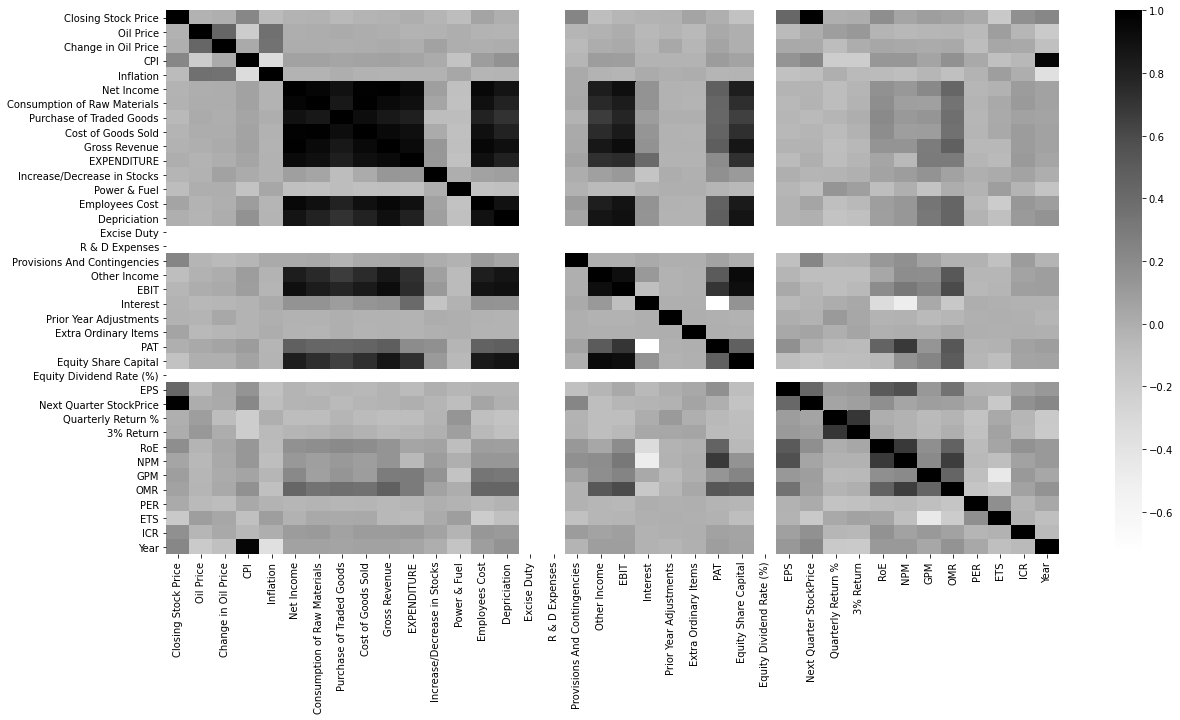

In [ ]:
# Checking the Correlation of the variables

plt.figure(figsize=(20,10))
corr_df = df.corr()
sns.heatmap(corr_df, cmap = "Greys");

Based on the above correlation plot, we select a subset of features that:  
- Are not correlated to each other
- At least 2 industry based metrics (Oil Price and Inflation)
- At least 8 financial metrics

In [ ]:
# Creating the dataset which would be used for Prediction & Classification models with the ratio's.
final_df = df[['Year', 'Month','Company', 'Oil Price', 'Inflation', 'Net Income',
               'EPS', 'RoE', 'NPM', 'GPM', 'OMR', 'PER', 'ETS', 
               'Quarterly Return %']]
final_df.head()

,Year,Month,Company,Oil Price,Inflation,Net Income,EPS,RoE,NPM,GPM,OMR,PER,ETS,Quarterly Return %
0,2020,Mar,Britannia,2392.98,0.058,2691.94,15.85,15.848649,0.141593,0.413564,0.173169,213.261830,30.027217,NaN
1,2019,Dec,Britannia,4509.77,0.074,2819.19,14.99,14.983368,0.127820,0.396302,0.180162,201.951968,30.557013,0.116587
2,2019,Sep,Britannia,4282.87,0.040,2896.09,20.50,17.585518,0.145914,0.382944,0.194711,143.717073,30.750584,0.027513
3,2019,Jun,Britannia,4149.67,0.032,2579.46,10.41,11.744070,0.109407,0.407403,0.161452,263.550432,27.801897,0.073860
4,2019,Mar,Britannia,4432.04,0.029,2668.10,12.05,12.055347,0.108575,0.417814,0.166501,255.764315,34.378302,-0.109800


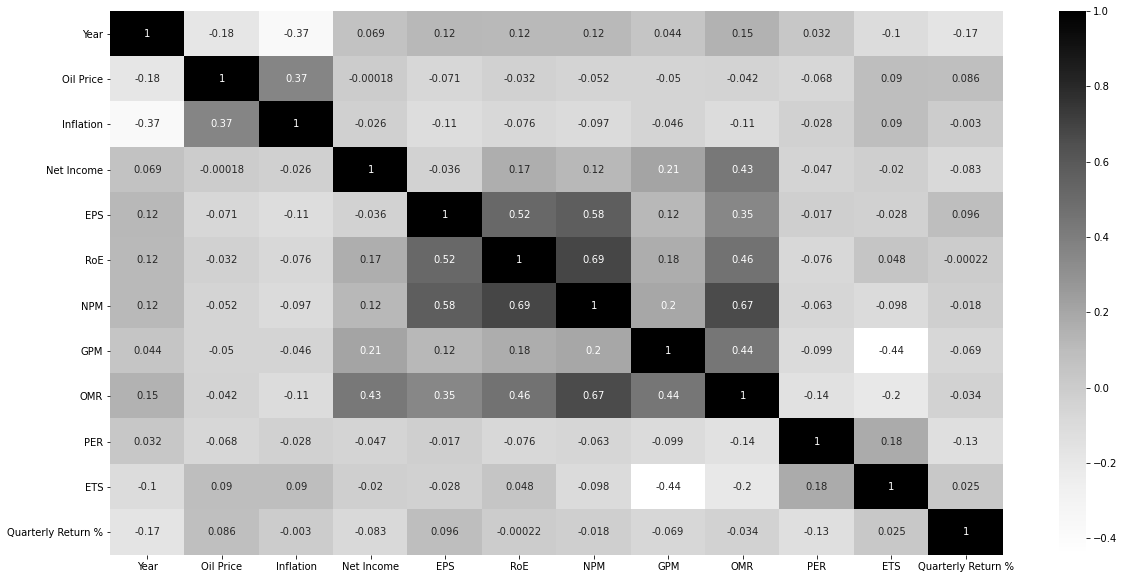

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(), annot=True, cmap = "Greys");

In [ ]:
# Dropping March 2020 data from the dataframe as considering Calendar Year

final_df = final_df[final_df["Year"]!=2020]
final_df.head()

,Year,Month,Company,Oil Price,Inflation,Net Income,EPS,RoE,NPM,GPM,OMR,PER,ETS,Quarterly Return %
1,2019,Dec,Britannia,4509.77,0.074,2819.19,14.99,14.983368,0.127820,0.396302,0.180162,201.951968,30.557013,0.116587
2,2019,Sep,Britannia,4282.87,0.040,2896.09,20.50,17.585518,0.145914,0.382944,0.194711,143.717073,30.750584,0.027513
3,2019,Jun,Britannia,4149.67,0.032,2579.46,10.41,11.744070,0.109407,0.407403,0.161452,263.550432,27.801897,0.073860
4,2019,Mar,Britannia,4432.04,0.029,2668.10,12.05,12.055347,0.108575,0.417814,0.166501,255.764315,34.378302,-0.109800
5,2018,Dec,Britannia,3822.07,0.021,2703.19,12.60,12.596754,0.111979,0.383950,0.171952,247.492063,31.590394,-0.011685


### Checking for Null values

In [ ]:
final_df.isna().sum()

Year                  0
Month                 0
Company               0
Oil Price             0
Inflation             0
Net Income            0
EPS                   0
RoE                   0
NPM                   0
GPM                   0
OMR                   0
PER                   0
ETS                   0
Quarterly Return %    0
dtype: int64

As there are no null values, we can proceed with our modelling

## 3. Data Preprocessing

We split the data according to the Regression problem statement  
i.e. target variable = Quarterly Return %


### 3.1 Data Split
We do train and test split prior to any preprocessing steps as doing it after would cause data leakage  
As per the problem statement, we store the 2019 data in test set and the rest into train set

In [ ]:
# Train & Test Split

df_test = final_df[final_df["Year"]==2019]
df_train = final_df[final_df["Year"]!=2019]

print(df_train.shape, df_test.shape)

(400, 14) (80, 14)


In [ ]:
# Splitting X and y features

y_train = df_train['Quarterly Return %']
y_test = df_test['Quarterly Return %']

X_train = df_train.drop(['Quarterly Return %'], axis=1)
X_test = df_test.drop(['Quarterly Return %'], axis=1)

print(y_train.shape, y_test.shape, X_train.shape, X_test.shape)

(400,) (80,) (400, 13) (80, 13)


### 3.2 Preprocessing

In [ ]:
# Splitting Categorical and Numerical Columns

all_cols = list(X_train.columns)
cat_cols = list(X_train.select_dtypes("object").columns)
num_cols = list(set(all_cols)- set(cat_cols))

In [ ]:
# One Hot Encoding for Categorical Columns

from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(drop="first")
ohe_encoder.fit(X_train[cat_cols])
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_cols))
print(ohe_encoder.categories_)

[array(['Dec', 'Jun', 'Mar', 'Sep'], dtype=object), array(['Britannia', 'CCL Products India Ltd.', 'Colgate Palmolive',
       'Dabur India', 'Emami', 'Gillette India', 'Globus Spirits Ltd.',
       'Godrej Consumer', 'Hatson Agro', 'Heritage Foods',
       'Hindustan Unilever', 'ITC', 'Jubiliant Foodworks', 'Marico',
       'Nestle', 'Procter & Gamble', 'Tasty Bite Eatables',
       'Tata Consumer Products', 'United Breweries Ltd.',
       'United Spirits Ltd'], dtype=object)]


In [ ]:
all_feature_names = encoded_cat_names + num_cols
print(all_feature_names)

['Month_Jun', 'Month_Mar', 'Month_Sep', 'Company_CCL Products India Ltd.', 'Company_Colgate Palmolive', 'Company_Dabur India', 'Company_Emami', 'Company_Gillette India', 'Company_Globus Spirits Ltd.', 'Company_Godrej Consumer', 'Company_Hatson Agro', 'Company_Heritage Foods', 'Company_Hindustan Unilever', 'Company_ITC', 'Company_Jubiliant Foodworks', 'Company_Marico', 'Company_Nestle', 'Company_Procter & Gamble', 'Company_Tasty Bite Eatables', 'Company_Tata Consumer Products', 'Company_United Breweries Ltd.', 'Company_United Spirits Ltd', 'EPS', 'GPM', 'Net Income', 'ETS', 'RoE', 'PER', 'Year', 'Inflation', 'OMR', 'Oil Price', 'NPM']


In [ ]:
#Normalizing/Scaling the numberical Variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[num_cols])

StandardScaler()

### 3.3 Creating Pipelines

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('cat', ohe_encoder, cat_cols), 
                                               ('sc', sc, num_cols)], remainder='passthrough')

## 4. Regression Modelling

### 4.1 Linear, Lasso, Ridge Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lreg = LinearRegression()
lasso_reg = Lasso(random_state=1)
ridge_reg = Ridge(random_state=1)

In [ ]:
from sklearn.pipeline import Pipeline
lreg_v1     = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lreg)])
lasso_regv1 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lasso_reg)])
ridge_regv1 = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ridge_reg)])

#### 4.1.a Training Model

In [ ]:
lreg_v1.fit(X_train, y_train)
lasso_regv1.fit(X_train, y_train)
ridge_regv1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Month', 'Company']),
                                                 ('sc', StandardScaler(),
                                                  ['EPS', 'GPM', 'Net Income',
                                                   'ETS', 'RoE', 'PER', 'Year',
                                                   'Inflation', 'OMR',
                                                   'Oil Price', 'NPM'])])),
                ('regressor', Ridge(random_state=1))])

In [ ]:
y_pred_linear = lreg_v1.predict(X_test)
y_pred_lasso  = lasso_regv1.predict(X_test)
y_pred_ridge  = ridge_regv1.predict(X_test)

#### 4.1.b Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_lr    = mean_squared_error(y_test, y_pred_linear, squared = False)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print("RMSE for Linear Regression: {:.4f}".format(rmse_lr))
print("RMSE for Lasso Regression: {:.4f}".format(rmse_lasso))
print("RMSE for Ridge Regression: {:.4f}".format(rmse_ridge))

RMSE for Linear Regression: 0.1589
RMSE for Lasso Regression: 0.1586
RMSE for Ridge Regression: 0.1562


In [ ]:
r_squared      = lreg_v1.score(X_test, y_pred_linear)
r_squaredlasso = lasso_regv1.score(X_test, y_pred_lasso)
r_squaredridge = ridge_regv1.score(X_test, y_pred_ridge)

print("R^2 for Linear Regression: {}".format(r_squared))
print("R^2 for Lasso Regression: {}".format(r_squaredlasso))
print("R^2 for Ridge Regression: {}".format(r_squaredridge))

R^2 for Linear Regression: 1.0
R^2 for Lasso Regression: 1.0
R^2 for Ridge Regression: 1.0


#### 4.1.c Hyper-parameter Tuning

In [ ]:
# Finding optimal alpha with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lasso_reg_grid = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, scoring='r2', verbose=0, n_jobs=-1)
ridge_reg_grid = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='r2', verbose=0, n_jobs=-1)

For getting the best parameters, we will have to manually fit the processed x_train and y_train  
The Pipeline built cannot be used for the same

In [ ]:
# Extracting the processed x_train and x_test data

x_train_tns = preprocessor.fit_transform(X_train)
x_test_tns = preprocessor.fit_transform(X_test)

In [ ]:
lasso_reg_grid.fit(x_train_tns, y_train)

GridSearchCV(estimator=Lasso(random_state=1), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [ ]:
print("Best hyper-parameters for Lasso Regression: ",lasso_reg_grid.best_estimator_)

Best hyper-parameters for Lasso Regression:  Lasso(alpha=0.001, random_state=1)


In [ ]:
lasso_reg_grid.fit(x_train_tns, y_train)

GridSearchCV(estimator=Lasso(random_state=1), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [ ]:
print("Best hyper-parameters for Lasso Regression",lasso_reg_grid.best_estimator_)

Best hyper-parameters for Lasso Regression Lasso(alpha=0.001, random_state=1)


#### 4.1.d Error Analysis

In [ ]:
# Since ridge had the lowest rmse, lets analyze the error of Ridge regression

df_error = pd.DataFrame(y_test)
df_error['Ridge Prediction'] = y_pred_ridge
df_error['Ridge Residual'] = df_error['Quarterly Return %'] - df_error['Ridge Prediction']

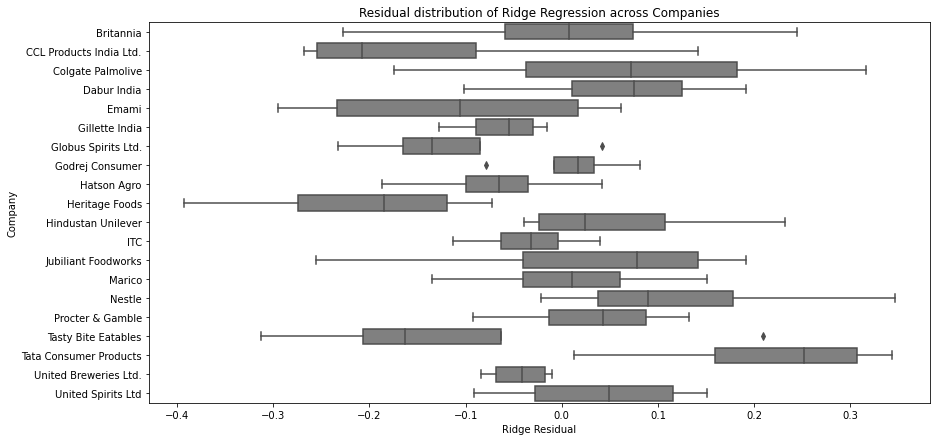

In [ ]:
df_test = df_test.merge(df_error)
plt.figure(figsize=(14, 7))
sns.boxplot(data = df_test, x = 'Ridge Residual', y = 'Company',color='grey')
plt.title("Residual distribution of Ridge Regression across Companies");

### 4.2. K-Nearest Neighbors - Regression

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

# We will use the transformed data for this regression

print(x_train_tns.shape, x_test_tns.shape)

(400, 33) (80, 33)


#### 4.2.a Training the model

In [ ]:
# Create neighbors
neighbors = list(np.arange(3, 15))
train_accuracies = []
test_accuracies = []

for neighbor in neighbors:
  
    # Set up a KNeighbourRegressor
    knn = KNeighborsRegressor(n_neighbors=neighbor, algorithm='kd_tree', weights='uniform')

    # Fit the model
    knn.fit(x_train_tns, y_train)

    # Compute accuracy
    train_accuracies.append(round(knn.score(x_train_tns, y_train),4))
    test_accuracies.append(round(knn.score(x_test_tns, y_test),4))
    
score_df = pd.DataFrame({'Neighbors': neighbors,
                         'train_r2_score': train_accuracies,
                         'test_r2_score': test_accuracies
                          })

score_df

,Neighbors,train_r2_score,test_r2_score
0,3,0.3704,-0.8953
1,4,0.3122,-0.6704
2,5,0.2512,-0.6108
3,6,0.2372,-0.5939
4,7,0.2317,-0.6203
5,8,0.2424,-0.5373
6,9,0.2444,-0.4977
7,10,0.2179,-0.4808
8,11,0.2091,-0.4281
9,12,0.2011,-0.4293


#### 4.2.b Model performance across neighbors

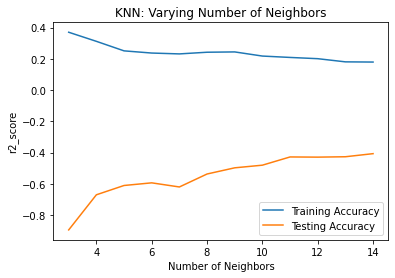

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies, label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies, label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("r2_score")

# Display the plot
plt.show();

As the number of neighbors increase, the test accuracy increases, while the train accuracy decreases (albeit slightly)  
Based on this lets take number of neighbors as 11

#### 4.2.c Hyper-parameter tuning 

In [ ]:
grid_params = {'n_neighbors':list(np.arange(3, 15)),
               'weights': ['uniform','distance'],
               'metric':['euclidean','manhattan']}


In [ ]:
knn_grid = GridSearchCV(KNeighborsRegressor(), grid_params,scoring='r2', verbose=0, n_jobs=-1)
knn_grid.fit(x_train_tns, y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
knn_grid.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=14, weights='distance')

#### 4.2.d Error Analysis

In [ ]:
knn = KNeighborsRegressor(n_neighbors=14, algorithm='kd_tree', weights='distance',metric='manhattan')

# Fit the model
knn.fit(x_train_tns, y_train)

knn_pred = knn.predict(x_test_tns)

df_test['KNN Prediction'] = knn_pred

df_test['KNN Residual'] = df_test['Quarterly Return %'] - df_test['KNN Prediction']

In [ ]:
rmse_knn = mean_squared_error(y_test, knn_pred, squared=False)

print("RMSE for KNN Regression: {:.4f}".format(rmse_knn))

RMSE for KNN Regression: 0.1599


In [ ]:
from sklearn.metrics import r2_score

r2_knn = r2_score(y_test, knn_pred)

print("R^2 for KNN Regression: {:.4f}".format(r2_knn))

R^2 for KNN Regression: -0.3485


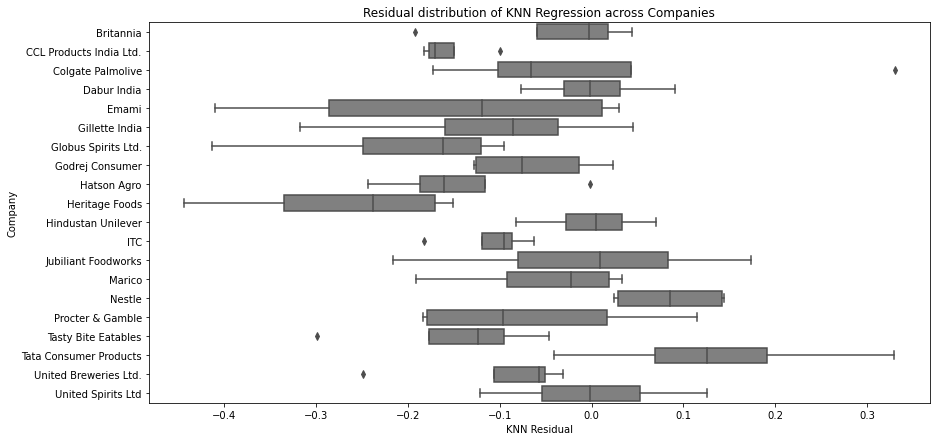

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data = df_test, x = 'KNN Residual', y = 'Company',color='grey')
plt.title("Residual distribution of KNN Regression across Companies");

## 5. Classification

### Preprocessing

In [ ]:
# Creating Y variable to check where returns are >= 3% Quarter on Quarter for company

df_train['Return3%'] = np.where(df_train['Quarterly Return %'] >=0.03, 1,0)
df_test['Return3%'] = np.where(df_test['Quarterly Return %'] >=0.03, 1,0)

df_train['Return3%'].value_counts()

1    214
0    186
Name: Return3%, dtype: int64

In [ ]:
# X and y features split

y_train = df_train['Return3%']
y_test = df_test['Return3%']

X_train = df_train.drop(['Return3%',"Quarterly Return %"], axis=1)
X_test = df_test.drop(['Return3%',"Quarterly Return %",
                       'Ridge Prediction', 'Ridge Residual', 
                       'KNN Prediction','KNN Residual'], axis=1)

print(y_train.shape, y_test.shape,X_train.shape, X_test.shape)

(400,) (80,) (400, 13) (80, 13)


In [ ]:
# Preprocess the features by one hot encoding for categorical and scaling for numerical variables

X_train_tsfmd = preprocessor.fit_transform(X_train)
X_test_tsfmd = preprocessor.fit_transform(X_test)

### 5.1. KNeighbors Classifier

#### 5.1.a Training the Model

In [ ]:
print(X_train_tsfmd.shape, X_test_tsfmd.shape)

(400, 33) (80, 33)


In [ ]:
# Import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Create neighbors
neighbors = list(np.arange(3, 15))
knn_accuracies = []

for neighbor in neighbors:
  
    # Set up a KNeighbourRegressor
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train_tsfmd, y_train)
    
    y_pred = knn.predict(X_test_tsfmd)

    # Compute accuracy
    knn_accuracies.append(accuracy_score(y_test, y_pred))
    
score_df = pd.DataFrame({'Neighbors': neighbors,
                           'Accuracy': knn_accuracies
                          })

score_df

,Neighbors,Accuracy
0,3,0.5375
1,4,0.5750
2,5,0.4875
3,6,0.5750
4,7,0.5250
5,8,0.5375
6,9,0.5125
7,10,0.5375
8,11,0.5250
9,12,0.5625


#### 5.1.b Model performance across neighbors

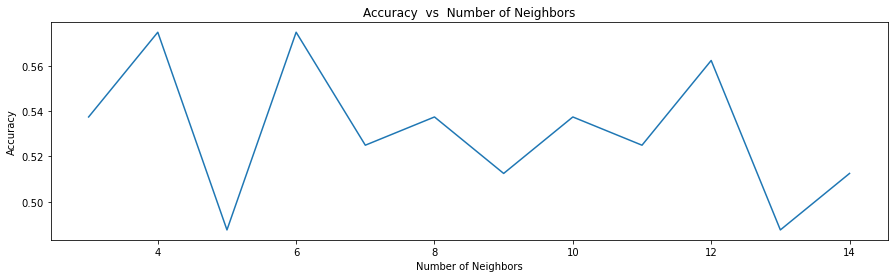

In [ ]:
# Plot test accuracies
plt.figure(figsize=(15,4))
plt.plot(score_df.Neighbors, score_df.Accuracy)
plt.title("Accuracy  vs  Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy");

#### 5.1.c Hyper-parameter tuning

In [ ]:
grid_params = {'n_neighbors':list(np.arange(3, 15)),
               'weights': ['uniform','distance'],
               'metric':['euclidean','manhattan']}

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(), grid_params,scoring='accuracy', verbose=0, n_jobs=-1)
knn_grid.fit(X_train_tsfmd, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(knn_grid.best_estimator_)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)


#### 5.1.d Error Analysis

In [ ]:
knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=13)
knn_clf.fit(X_train_tsfmd, y_train)
y_pred = knn_clf.predict(X_test_tsfmd)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def error_analysis(y_test, y_pred):
    
    # Print Accuracy Score     
    print("\n Accuracy score:",accuracy_score(y_test, y_pred))
    
    # Print Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels = [1,0])
    cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['More than 3%', 'Less than 3%'])
    cm_plot.plot();
    print("\n")
    
    # Print Classification report
    print(classification_report(y_test, y_pred))
    print("\n")

KNN Classified Error Analysis

 Accuracy score: 0.45


              precision    recall  f1-score   support

           0       0.57      0.46      0.51        50
           1       0.33      0.43      0.37        30

    accuracy                           0.45        80
   macro avg       0.45      0.45      0.44        80
weighted avg       0.48      0.45      0.46        80





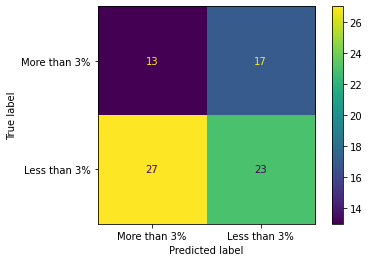

In [ ]:
print("KNN Classified Error Analysis")
error_analysis(y_test, y_pred)

### 5.2 Logistic Regression

#### 5.2.a Training the Model

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(random_state = 100, max_iter = 1000)

# Fit the model using Pipeline
logreg_v1 = Pipeline(steps=[('preprocessor', preprocessor),('regressor', logreg)])

logreg_v1.fit(X_train, y_train)

# Predicting on test set
y_pred = logreg_v1.predict(X_test)


#### 5.2.b Error Analysis

Error Analysis for Logistic Regression

 Accuracy score: 0.5875


              precision    recall  f1-score   support

           0       0.67      0.68      0.67        50
           1       0.45      0.43      0.44        30

    accuracy                           0.59        80
   macro avg       0.56      0.56      0.56        80
weighted avg       0.58      0.59      0.59        80





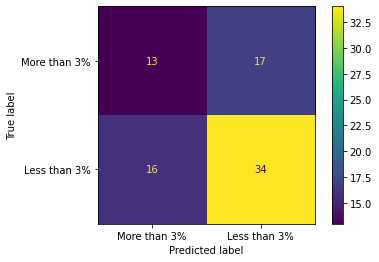

In [ ]:
print("Error Analysis for Logistic Regression")

error_analysis(y_test, y_pred)

### 5.3 Random Forest Classifier

### V. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_v1 = DecisionTreeClassifier(max_depth=10, criterion = 'gini', random_state=0)

In [ ]:
dt_clf_v1 = Pipeline(steps=[('preprocessor', preprocessor),('regressor', tree_v1)])
dt_clf_v1.fit(X_train, y_train)
y_dt_pred = dt_clf_v1.predict(X_test)

Accuracy:  0.3875


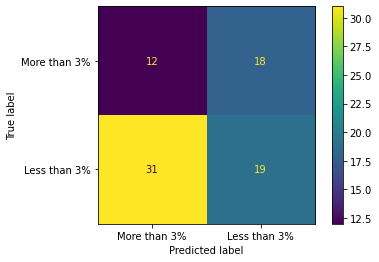

In [ ]:
print("Accuracy: ",accuracy_score(y_test, y_dt_pred))

cm = confusion_matrix(y_test, y_dt_pred, labels = [1,0])
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['More than 3%', 'Less than 3%'])
cm_plot.plot();

### Visualizing the Tree

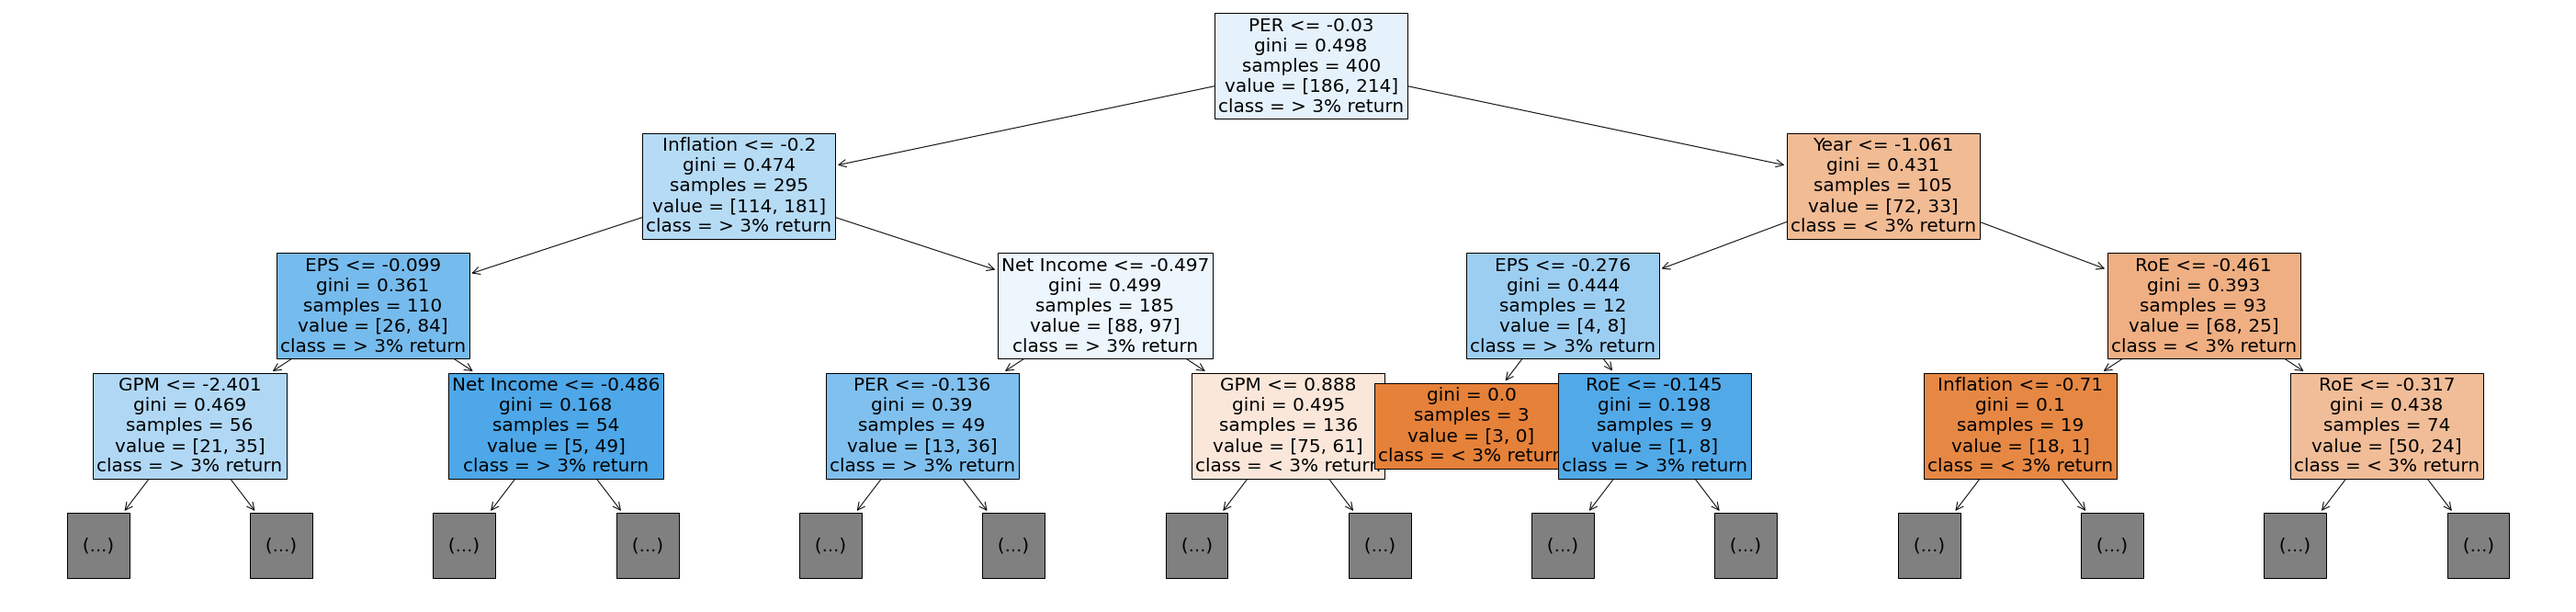

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50, 12))
plot_tree(tree_v1,max_depth = 3,
          feature_names = all_feature_names,
          class_names = ['< 3% return', '> 3% return'],
          filled = True,
          fontsize = 20);
plt.savefig('tree.png')